In [1]:
import ssl
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display, Image

# Image we are basing our code on
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'

example = Image(url=url, width=600)

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives

* concatenate data with pandas

* merge data with pandas

* understand tidy data formatting

* melt and pivot data with pandas

Links

* [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)

* [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)

  * Combine Data Sets: Standard Joins

  * Tidy Data

  * Reshaping Data

* Python Data Science Handbook

  * [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append

  * [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join

  * [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping

  * [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables

Reference

* Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)

* Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [2]:

##### YOUR CODE HERE #####
# All data is stored in the data folder
# I extract them outside of Jupyter-lab
# I want to iterate over each file and list
# the columns contained within those csv's
# from the image, we need the following
# features:

needed = ['user_id', 
          'order_id', 
          'order_number', 
          'order_dow', 
          'order_hour_of_day', 
          'add_to_cart_order',
          'product_id',
          'product_name']

path = '../../data/instacart_2017_05_01/'

for f in glob.glob(path + '*.csv'):
    df=pd.read_csv(f)
    print(f)
    print('********************************************************')
    matched = []
    unmatched = []
    for c in df.columns:
        if c in needed:
            matched.append(c)
        else:
            unmatched.append(c)
    
    if len(matched) < 1:
        print('NOTHING NEEDED FROM HERE')
    else:
        print('NEED:')
        print('*********')
        for m in matched:
            print(m)
        print()
        print('CAN BE DROPPED:')
        print('****************')
        for u in unmatched:
            print(u)
    
    
    print('shape:')
    print(df.shape)
    print()    

../../data/instacart_2017_05_01/aisles.csv
********************************************************
NOTHING NEEDED FROM HERE
shape:
(134, 2)

../../data/instacart_2017_05_01/departments.csv
********************************************************
NOTHING NEEDED FROM HERE
shape:
(21, 2)

../../data/instacart_2017_05_01/order_products__prior.csv
********************************************************
NEED:
*********
order_id
product_id
add_to_cart_order

CAN BE DROPPED:
****************
reordered
shape:
(32434489, 4)

../../data/instacart_2017_05_01/order_products__train.csv
********************************************************
NEED:
*********
order_id
product_id
add_to_cart_order

CAN BE DROPPED:
****************
reordered
shape:
(1384617, 4)

../../data/instacart_2017_05_01/orders.csv
********************************************************
NEED:
*********
order_id
user_id
order_number
order_dow
order_hour_of_day

CAN BE DROPPED:
****************
eval_set
days_since_prior_order
sha

In [3]:
# order_products__prior
order_products__prior = pd.read_csv(path + 'order_products__prior.csv')
order_products__prior = order_products__prior.drop(['reordered'], axis = 1)

# order_products__train
order_products__train = pd.read_csv(path + 'order_products__train.csv')
order_products__train = order_products__train.drop(['reordered'], axis = 1)

# orders
orders = pd.read_csv(path + 'orders.csv')
orders = orders.drop(['eval_set','days_since_prior_order'], axis = 1)

# products
products = pd.read_csv(path + 'products.csv')
products = products.drop(['aisle_id', 'department_id'], axis = 1)

dfs = [[order_products__prior,'order_products__prior'],
       [order_products__train,'order_products__train'],
       [orders,'orders'],
       [products,'products']]

for df in dfs:
    print(df[1])
    print('********************')
    print(df[0].head(3))
    print(df[0].shape)
    print()

order_products__prior
********************
   order_id  product_id  add_to_cart_order
0         2       33120                  1
1         2       28985                  2
2         2        9327                  3
(32434489, 3)

order_products__train
********************
   order_id  product_id  add_to_cart_order
0         1       49302                  1
1         1       11109                  2
2         1       10246                  3
(1384617, 3)

orders
********************
   order_id  user_id  order_number  order_dow  order_hour_of_day
0   2539329        1             1          2                  8
1   2398795        1             2          3                  7
2    473747        1             3          3                 12
(3421083, 5)

products
********************
   product_id                          product_name
0           1            Chocolate Sandwich Cookies
1           2                      All-Seasons Salt
2           3  Robust Golden Unsweetened Oolong Tea
(

In [4]:
# Concencating order_products__prior
# and order_products__train
order_products = pd.concat([order_products__prior, 
                            order_products__train])

print(order_products.head())
print(order_products.shape)

   order_id  product_id  add_to_cart_order
0         2       33120                  1
1         2       28985                  2
2         2        9327                  3
3         2       45918                  4
4         2       30035                  5
(33819106, 3)


In [5]:
# Merging orders, and order products on order_id
orders_and_products = pd.merge(orders, order_products, on='order_id', how='inner')
# Merging orders_and_products with products on product_id
orders_and_products = pd.merge(orders_and_products, products, on='product_id', how='inner')

print(orders_and_products.head())
print(orders_and_products.shape)

   order_id  user_id  order_number  order_dow  order_hour_of_day  product_id  \
0   2539329        1             1          2                  8         196   
1   2398795        1             2          3                  7         196   
2    473747        1             3          3                 12         196   
3   2254736        1             4          4                  7         196   
4    431534        1             5          4                 15         196   

   add_to_cart_order product_name  
0                  1         Soda  
1                  1         Soda  
2                  1         Soda  
3                  1         Soda  
4                  1         Soda  
(33819106, 8)


In [6]:
# Need product name, merging orders_and_products
# with products on product_id, conditionally

top_ten = ['Banana',
           'Bag of Organic Bananas',
           'Organic Strawberries',
           'Organic Baby Spinach',
           'Organic Hass Avocado',
           'Organic Avocado',
           'Large Lemon',
           'Strawberries',
           'Limes',
           'Organic Whole Milk'] 

orders_products_subset = orders_and_products[orders_and_products['product_name'].isin(top_ten)]

In [8]:
# Put product names, and counts
# into their own df

top_ten_products = orders_products_subset['product_name'].value_counts().to_frame()
top_ten_products = top_ten_products.reset_index()
top_ten_products = top_ten_products.rename(columns={
    'index': 'product_name', 
    'product_name': 'count'
})
top_ten_products.head(10)

,product_name,count
0,Banana,491291
1,Bag of Organic Bananas,394930
2,Organic Strawberries,275577
3,Organic Baby Spinach,251705
4,Organic Hass Avocado,220877
5,Organic Avocado,184224
6,Large Lemon,160792
7,Strawberries,149445
8,Limes,146660
9,Organic Whole Milk,142813


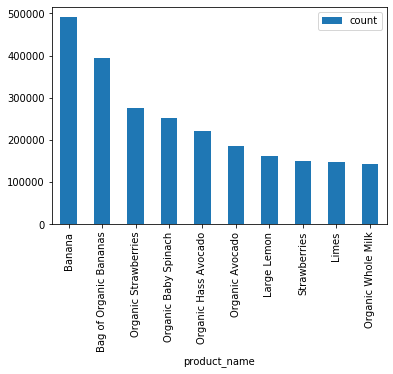

In [11]:
# Graph it
top_ten_products.plot(kind='bar', 
                      x = 'product_name', 
                      y = 'count')

## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [51]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [58]:
# table2 -> tidy
table2 = table2.reset_index()

tidy2 = table2.melt(id_vars='index', 
                    value_vars=['John Smith',
                                'Jane Doe',
                                'Mary Johnson'])

tidy2 = tidy2.rename(columns={
    'index': 'treatment', 
    'variable': 'name', 
    'value': 'result'
})

tidy2.treatment = tidy2['treatment'].str.replace('treatment', '')

tidy2

,treatment,name,result
0,a,John Smith,NaN
1,b,John Smith,2.0
2,a,Jane Doe,16.0
3,b,Jane Doe,11.0
4,a,Mary Johnson,3.0
5,b,Mary Johnson,1.0


In [60]:
# tidy -> table2
table2 = tidy2.pivot_table(index='name', 
                           columns='treatment', 
                           values='result')
table2


treatment,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


In [154]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [155]:
# Flights Pivot Table|
flights = flights.pivot_table(index='year', 
                           columns='month', 
                           values='passengers')
flights

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


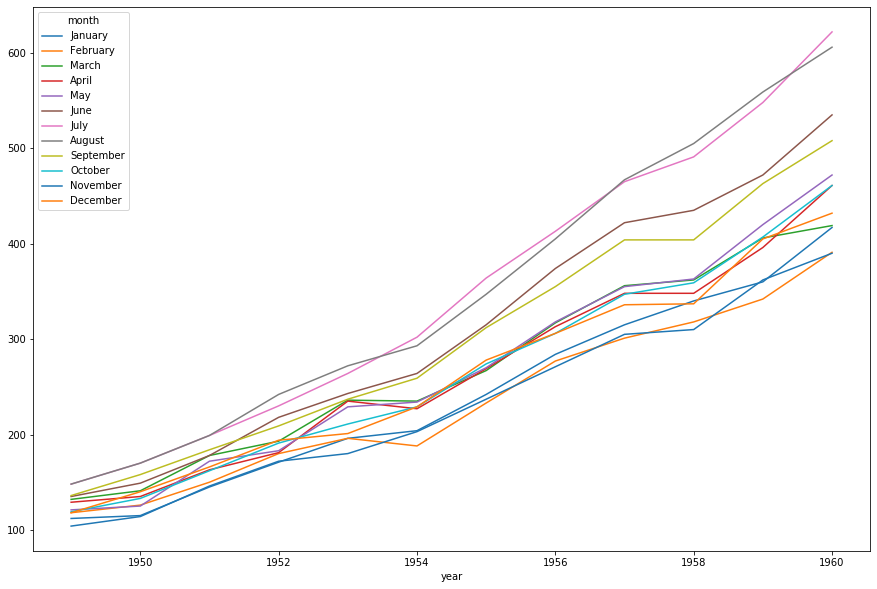

In [168]:
# Simple plot to take peeps at it
plt.rcParams["figure.figsize"] = (15,10)
flights.plot()

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [131]:
##### YOUR CODE HERE #####
# Create dataframe with products and counts
top_products = orders_and_products['product_name'].value_counts().to_frame()

top_products = top_products.reset_index()
top_products = top_products.rename(columns={
    'index': 'product_name', 
    'product_name': 'count'
})

top_products.head()

,product_name,count
0,Banana,491291
1,Bag of Organic Bananas,394930
2,Organic Strawberries,275577
3,Organic Baby Spinach,251705
4,Organic Hass Avocado,220877


In [144]:
# Subset orders >= 2900
top_products_subset = top_products[top_products['count'] >= 2900]

top_products_subset.head()

,product_name,count
0,Banana,491291
1,Bag of Organic Bananas,394930
2,Organic Strawberries,275577
3,Organic Baby Spinach,251705
4,Organic Hass Avocado,220877


In [145]:
top_products_subset.tail()

,product_name,count
2048,Stage 1 - Just Prunes,2902
2049,Whole Chia Seeds,2902
2050,3 lb Clementines,2901
2051,Organic Fiber & Protein Pear Blueberry & Spina...,2900
2052,Smoked Apple Sage Sausages,2900


In [163]:
product_hours_of_day = orders_and_products[['product_name', 'order_hour_of_day']]

product_hours_of_day['order_hour_of_day'].value_counts()

10    2874905
11    2852701
14    2810918
15    2780731
13    2778054
12    2732599
16    2647695
9     2550569
17    2186409
8     1787359
18    1714445
19    1317576
20    1017958
7      928239
21     831183
22     662053
23     419585
6      302642
0      228031
1      121412
5       91909
2       72660
4       55714
3       53759
Name: order_hour_of_day, dtype: int64

In [152]:
product_hours_of_day.groupby(['order_hour_of_day']).head()

,product_name,order_hour_of_day
0,Soda,8
1,Soda,7
2,Soda,12
3,Soda,7
4,Soda,15
...,...,...
4159,Soda,4
4163,Soda,3
5316,Soda,2
5443,Soda,4


## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [ ]:
##### YOUR CODE HERE #####